# Nueva sección

In [11]:
import os
import pandas as pd

# Montar Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Definir la ruta base
base_path = '/content/drive/My Drive/PP'  # Ruta a la carpeta "PP"

# Inicializar diccionarios para almacenar DataFrames
dataframes = {}

# Listar conjuntos de datos
for set_type in ['train', 'test', 'validation']:
    set_path = os.path.join(base_path, set_type)

    # Verificar si la ruta existe
    if not os.path.exists(set_path):
        print(f"Ruta no encontrada: {set_path}")
        continue

    # Inicializar listas para almacenar los datos
    image_files = []
    labels = []

    # Recorrer las carpetas de categorías
    for category in os.listdir(set_path):
        category_path = os.path.join(set_path, category)

        # Asegurarse de que sea una carpeta
        if os.path.isdir(category_path):
            for filename in os.listdir(category_path):
                image_files.append(os.path.join(category, filename))
                labels.append(category)  # Usar el nombre de la carpeta como etiqueta

    # Crear un DataFrame para el conjunto actual
    df = pd.DataFrame({'filename': image_files, 'label': labels})
    dataframes[set_type] = df  # Guardar el DataFrame en el diccionario

    # Mostrar las primeras filas del DataFrame
    print(f"DataFrame para {set_type}:")
    print(df.head(), "\n")

# Acceder a los DataFrames
train_df = dataframes.get('train', pd.DataFrame())
test_df = dataframes.get('test', pd.DataFrame())
validation_df = dataframes.get('validation', pd.DataFrame())

# Comprobar el tamaño de los DataFrames
print(f"Tamaño del DataFrame de entrenamiento: {train_df.shape}")
print(f"Tamaño del DataFrame de prueba: {test_df.shape}")
print(f"Tamaño del DataFrame de validación: {validation_df.shape}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
DataFrame para train:
Empty DataFrame
Columns: [filename, label]
Index: [] 

DataFrame para test:
            filename     label
0  Cucumber/1004.jpg  Cucumber
1  Cucumber/1008.jpg  Cucumber
2  Cucumber/1001.jpg  Cucumber
3  Cucumber/1002.jpg  Cucumber
4  Cucumber/1007.jpg  Cucumber 

DataFrame para validation:
Empty DataFrame
Columns: [filename, label]
Index: [] 

Tamaño del DataFrame de entrenamiento: (0, 2)
Tamaño del DataFrame de prueba: (139, 2)
Tamaño del DataFrame de validación: (0, 2)


In [12]:
# Inspeccionar los DataFrames
for set_type, df in dataframes.items():
    print(f"DataFrame para {set_type}:")
    print(df.head())  # Mostrar las primeras filas
    print(f"Tamaño: {df.shape}\n")  # Mostrar el tamaño



DataFrame para train:
Empty DataFrame
Columns: [filename, label]
Index: []
Tamaño: (0, 2)

DataFrame para test:
            filename     label
0  Cucumber/1004.jpg  Cucumber
1  Cucumber/1008.jpg  Cucumber
2  Cucumber/1001.jpg  Cucumber
3  Cucumber/1002.jpg  Cucumber
4  Cucumber/1007.jpg  Cucumber
Tamaño: (139, 2)

DataFrame para validation:
Empty DataFrame
Columns: [filename, label]
Index: []
Tamaño: (0, 2)



# conjunto de datos de entrenamiento

In [22]:
# Imprimir 5 imágenes del conjunto de test
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
plt.figure(figsize=(15, 10))
for i in range(5):
    img_path = os.path.join(base_path, 'train', train_df['filename'][i])
    img = mpimg.imread(img_path)

    plt.subplot(1, 5, i + 1)
    plt.imshow(img)
    plt.title(test_df['label'][i])
    plt.axis('off')  # No mostrar ejes

plt.show()

KeyError: 0

<Figure size 1500x1000 with 0 Axes>

# Conjunto de datos de prueba

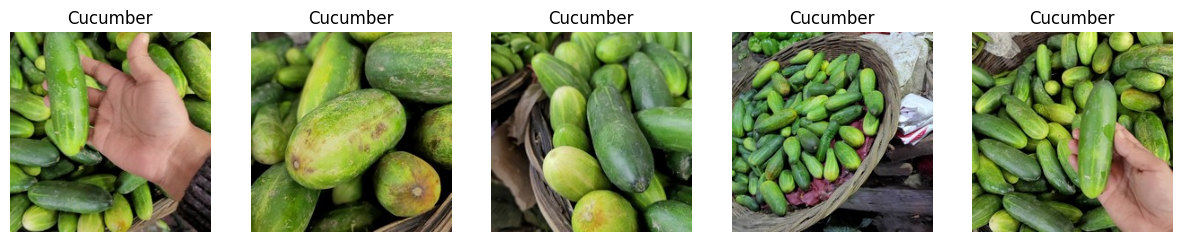

In [21]:
# Imprimir 5 imágenes del conjunto de test
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
plt.figure(figsize=(15, 10))
for i in range(5):
    img_path = os.path.join(base_path, 'test', test_df['filename'][i])
    img = mpimg.imread(img_path)

    plt.subplot(1, 5, i + 1)
    plt.imshow(img)
    plt.title(test_df['label'][i])
    plt.axis('off')  # No mostrar ejes

plt.show()

# conjunto de datos de validación

In [ ]:
# Imprimir 5 imágenes del conjunto de test
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
plt.figure(figsize=(15, 10))
for i in range(5):
    img_path = os.path.join(base_path, 'validation', validation_df['filename'][i])
    img = mpimg.imread(img_path)

    plt.subplot(1, 5, i + 1)
    plt.imshow(img)
    plt.title(test_df['label'][i])
    plt.axis('off')  # No mostrar ejes

plt.show()

In [41]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Definir parámetros de augmentación para el conjunto de entrenamiento
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Definir solo normalización para los conjuntos de prueba y validación
test_datagen = ImageDataGenerator(rescale=1./255)

# Generar datos para el conjunto de entrenamiento
train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    directory='/content/Vegetable Images/train',  # Cambiar esto si es necesario
    x_col='filename',
    y_col='label',
    class_mode='categorical',
    target_size=(150, 150),
    batch_size=32
)

# Generar datos para el conjunto de validación
validation_generator = test_datagen.flow_from_dataframe(
    dataframe=validation_df,
    directory='/content/Vegetable Images/validation',  # Cambiar esto si es necesario
    x_col='filename',
    y_col='label',
    class_mode='categorical',
    target_size=(150, 150),
    batch_size=32
)

# Generar datos para el conjunto de test
test_generator = test_datagen.flow_from_dataframe(
    dataframe=test_df,
    directory='/content/Vegetable Images/test',  # Cambiar esto si es necesario
    x_col='filename',
    y_col='label',
    class_mode='categorical',
    target_size=(150, 150),
    batch_size=32
)


Found 15000 validated image filenames belonging to 15 classes.
Found 3000 validated image filenames belonging to 15 classes.
Found 3000 validated image filenames belonging to 15 classes.


In [42]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Definir el modelo
from tensorflow.keras import models, layers

# Definición del modelo secuencial
model = models.Sequential([

    # Primera capa convolucional: 32 filtros de 3x3, activación ReLU, entrada de 150x150x3
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),

    # Capa de max pooling: reduce la dimensión de la salida anterior
    layers.MaxPooling2D(pool_size=(2, 2)),

    # Segunda capa convolucional: 64 filtros de 3x3, activación ReLU
    layers.Conv2D(64, (3, 3), activation='relu'),

    # Otra capa de max pooling
    layers.MaxPooling2D(pool_size=(2, 2)),

    # Tercera capa convolucional: 128 filtros de 3x3, activación ReLU
    layers.Conv2D(128, (3, 3), activation='relu'),

    # Otra capa de max pooling
    layers.MaxPooling2D(pool_size=(2, 2)),

    # Aplanar la salida 2D a un vector unidimensional
    layers.Flatten(),

    # Capa densa con 128 neuronas y activación ReLU
    layers.Dense(128, activation='relu'),

    # Capa de dropout: desactiva el 50% de las neuronas para prevenir sobreajuste
    layers.Dropout(0.5),

    # Capa de salida: neuronas igual al número de clases, activación softmax
    layers.Dense(len(train_df['label'].unique()), activation='softmax')
])


# Compilar el modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [43]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)                   │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 128)                 │       4,735,104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 15)                  │           1,935 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,830,287 (18.43 MB)

 Trainable params: 4,830,287 (18.43 MB)

 Non-trainable params: 0 (0.00 B)

In [44]:
# Entrenamiento
# Entrenamiento
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    validation_data=validation_generator,
    validation_steps=len(validation_generator),
    epochs=2,
    verbose=1  # Cambiar a 1 para imprimir los resultados por cada época
)


Epoch 1/2


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


187/469 ━━━━━━━━━━━━━━━━━━━━ 8:52 2s/step - accuracy: 0.1646 - loss: 2.5490

KeyboardInterrupt: 

In [ ]:
import matplotlib.pyplot as plt

# Graficar la precisión
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)  # 1 fila, 2 columnas, 1ª gráfica
plt.plot(history.history['accuracy'], label='Precisión de Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión de Validación')
plt.title('Precisión del Modelo')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()

# Graficar la pérdida
plt.subplot(1, 2, 2)  # 1 fila, 2 columnas, 2ª gráfica
plt.plot(history.history['loss'], label='Pérdida de Entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de Validación')
plt.title('Pérdida del Modelo')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
# Evaluar el modelo
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test accuracy: {test_accuracy:.2f}')


In [ ]:
# Guardar el modelo
model.save('modelo_planta.h5')  # Cambia el nombre del archivo según sea necesario
print("Modelo guardado exitosamente.")

In [ ]:
from tensorflow.keras.models import load_model

# Cargar el modelo
loaded_model = load_model('modelo_planta.h5')
print("Modelo cargado exitosamente.")

In [ ]:
# Entrenamiento
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    validation_data=validation_generator,
    validation_steps=len(validation_generator),
    epochs=20
)

# Guardar el modelo
model.save('modelo_planta.h5')
print("Modelo guardado exitosamente.")

# Evaluar el modelo
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test accuracy: {test_accuracy:.2f}')

# Cargar el modelo posteriormente (si es necesario)
loaded_model = load_model('modelo_planta.h5')
print("Modelo cargado exitosamente.")


In [47]:
# modelos preentrenados
# Cargar VGG16 preentrenado
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
vgg_model = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

# Congelar las capas de VGG16
for layer in vgg_model.layers:
    layer.trainable = False

# Crear modelo secuencial
vgg_model_final = Sequential([
    vgg_model,
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),  # Regularización
    Dense(len(train_generator.class_indices), activation='softmax')  # Capa de salida
])

# Compilar modelo
vgg_model_final.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])


In [48]:
vgg_model.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)           │ (None, 150, 150, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 150, 150, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 150, 150, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 75, 75, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 75, 75, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 75, 75, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 37, 37, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 37, 37, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 37, 37, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 37, 37, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 18, 18, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 18, 18, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 18, 18, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 18, 18, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 9, 9, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 9, 9, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 9, 9, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 9, 9, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 4, 4, 512)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 14,714,688 (56.13 MB)

In [50]:
# Cargar ResNet50 preentrenado

import tensorflow as tf
from tensorflow.keras.applications import VGG16, ResNet50
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam  # Importar Adam
resnet_model = ResNet50(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

# Congelar las capas de ResNet50
for layer in resnet_model.layers:
    layer.trainable = False

# Crear modelo secuencial
resnet_model_final = Sequential([
    resnet_model,
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),  # Regularización
    Dense(len(train_generator.class_indices), activation='softmax')  # Capa de salida
])

# Compilar modelo
resnet_model_final.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [1]:
# Callback para detener el entrenamiento temprano

import tensorflow as tf
from tensorflow.keras.applications import VGG16, ResNet50
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam  # Importar Adam
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

# Entrenar VGG16
vgg_history = vgg_model_final.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    validation_data=validation_generator,
    validation_steps=len(validation_generator),
    epochs=20,
    callbacks=[early_stopping]
)

# Entrenar ResNet50
resnet_history = resnet_model_final.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    validation_data=validation_generator,
    validation_steps=len(validation_generator),
    epochs=20,
    callbacks=[early_stopping]
)


NameError: name 'vgg_model_final' is not defined

In [ ]:
# Evaluar VGG16
vgg_score = vgg_model_final.evaluate(validation_generator)
print(f'VGG16 - Pérdida: {vgg_score[0]}, Precisión: {vgg_score[1]}')

# Evaluar ResNet50
resnet_score = resnet_model_final.evaluate(validation_generator)
print(f'ResNet50 - Pérdida: {resnet_score[0]}, Precisión: {resnet_score[1]}')


In [ ]:
import matplotlib.pyplot as plt

# Graficar la precisión
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(vgg_history.history['accuracy'], label='VGG16 - Train')
plt.plot(vgg_history.history['val_accuracy'], label='VGG16 - Validation')
plt.plot(resnet_history.history['accuracy'], label='ResNet50 - Train')
plt.plot(resnet_history.history['val_accuracy'], label='ResNet50 - Validation')
plt.title('Precisión del Modelo')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()

# Graficar la pérdida
plt.subplot(1, 2, 2)
plt.plot(vgg_history.history['loss'], label='VGG16 - Train')
plt.plot(vgg_history.history['val_loss'], label='VGG16 - Validation')
plt.plot(resnet_history.history['loss'], label='ResNet50 - Train')
plt.plot(resnet_history.history['val_loss'], label='ResNet50 - Validation')
plt.title('Pérdida del Modelo')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

plt.show()
